# Assignment 01: Supervised learning, linear models, and loss functions [100 points]

In this assignment, you're going to hard code OLS and LAD cost functions to fit regression lines to a data set. For hint, refer to the lecture slides and follow the same structure for your coding, functions etc.

## Data set

`Assignment_1_data.csv` represents the marks, number of courses taken, and study time of 100 students.

## Caveat

Once you are done, please do the following steps:

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1 and 2 until your notebook runs errors free.

4.  Submit your completed notebook to OWL by the deadline.

5.  Do not clear the answer outputs of your cells. When we open your notebooks for grading the outputs must be there, else marks will be deducted.


## Toolbox


In [1]:
# Import all the necessary packages:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as ss
import scipy.optimize as so
from IPython.display import display
%matplotlib inline


---

## Part 1

### Question 1.1 [14 points]

Read the `Assignment_1_data.csv` file as a `pandas.DataFrame`. Use appropriate pandas commands to show the descriptive statistics of the dataset as well as its first 10 rows.


In [2]:
# 6 points
# YOUR CODE HERE:
academics = pd.read_csv('Assignment_1_data.csv')

# Display the first 10 rows
print("First 10 Rows:")
print(academics.head(10))

# Display the descriptive statistics
print("\nDescriptive Statistics:")
print(academics.describe())


First 10 Rows:
   number_courses   Marks  time_study
0               3  19.202      13.524
1               4   7.734       0.384
2               4  13.811      12.532
3               6  53.018      47.454
4               8  55.299      62.488
5               6  17.822      19.266
6               3  29.889      18.189
7               5  17.264      17.065
8               4  20.348      17.640
9               3  30.862      18.519

Descriptive Statistics:
       number_courses       Marks  time_study
count      100.000000  100.000000  100.000000
mean         5.290000   24.417690   22.434030
std          1.799523   14.326199   16.692231
min          3.000000    5.609000    0.384000
25%          4.000000   12.633000    9.567750
50%          5.000000   20.059500   18.763000
75%          7.000000   36.676250   31.468000
max          8.000000   55.299000   62.488000


Add a new column to the dataframe and name it as "time_study_avg". Divide each student's "time_study" by his/her "number_courses" to calculate this new attribute. Then, drop the original "time_study" column as we do not need it anymore.


In [3]:
# 2 pts
# YOUR CODE HERE:
academics['time_study_avg'] = academics['time_study'] / academics['number_courses']
academics.drop(['time_study'], axis=1, inplace=True)
academics.head(10)


,number_courses,Marks,time_study_avg
0,3,19.202,4.508
1,4,7.734,0.096
2,4,13.811,3.133
3,6,53.018,7.909
4,8,55.299,7.811
5,6,17.822,3.211
6,3,29.889,6.063
7,5,17.264,3.413
8,4,20.348,4.410
9,3,30.862,6.173


Compute the Pearson’s Correlation Coefficient between study time per course and marks. Then Investigate the relationship between the students' study time and marks by plotting a scatter plot of the `time_study_avg` (x axis) and `Marks` columns (y axis). Add an `alpha` (transparency of the plotted dots) in case some data are overlapping. Remember to label the axes.


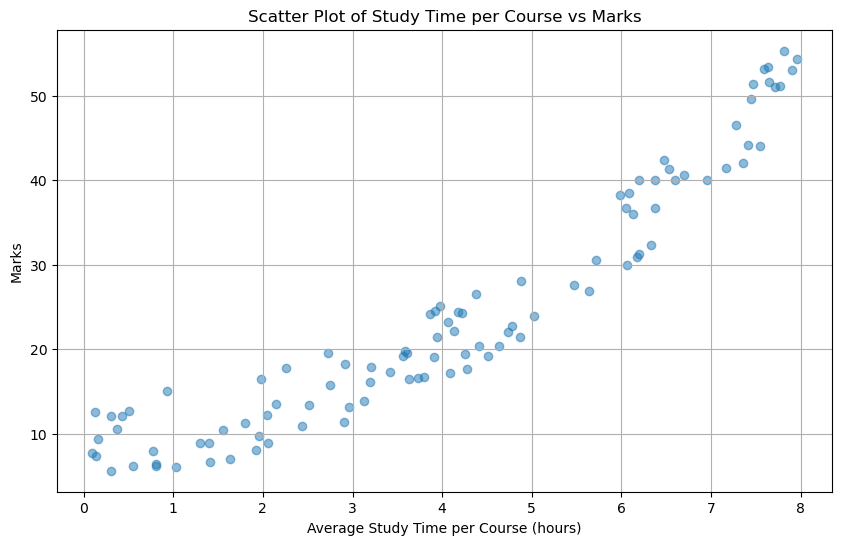

Pearson's Correlation Coefficient is:  0.9422538903640543


In [4]:
# 4 points
# YOUR CODE HERE:

corr = academics['time_study_avg'].corr(academics['Marks'])

plt.figure(figsize=(10, 6))
plt.scatter(academics['time_study_avg'], academics['Marks'], alpha=0.5) 
plt.title('Scatter Plot of Study Time per Course vs Marks')
plt.xlabel('Average Study Time per Course (hours)')
plt.ylabel('Marks')
plt.grid(True)
plt.show()

print("Pearson's Correlation Coefficient is: ", corr)


**Written question:** What do you see here? Discuss your findings. [2 points]


<font color='yellow'>**Written answer:**

I see that the pearson correlation coefficient is about 94.2% which means both columns are very correlated and this was then visually displayed through the scatter plot which shows the data plotted following a upwards and rightwards trend meaning that as average time studied increases the Students' marks also are shown to be higher and vice versa. If we plot a line to fit this trend it would be a linear line to the top right of the graph.</font>


---

### Question 1.2 [4 point]

Recall that the linear model, we obtain predictions by computing

$ \hat{\mathbf{y}} = \mathbf{X} \hat{\beta} $

Here, $\mathbf{X}$ is a design matrix which includes a column of ones, $\hat{\beta}$ are coefficients, and $\hat{\mathbf{y}}$ are outcomes. Write a function `linearModelPredict` to compute linear model predictions given data and a coefficient vector. The function should take as it's arguments a 1d-array of coefficients `b` and the design matrix `X` as a 2d-array and return linear model predictions `yp`.

Test the function by setting

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
```

Call your function using these values.

Report $\hat{\mathbf{y}}$.

What is the dimensionality of the numpy-array that you get back?

Hint: Read the documentation for `np.dot` or the `@` operator in `numpy`.


In [5]:
# 4pt
# YOUR CODE HERE:

# function to compute prediction
def linearModelPredict(b, X):
    yp = X @ b
    return yp

X = np.array([[1, 0], [1, -1], [1, 2]]) 
b = np.array([0.1, 0.3]) 

yp = linearModelPredict(b, X) # Compute the prediction
print('Prediction is ', yp)

dim_y = yp.shape
print('Dimensionality of output is ', dim_y)


Prediction is  [ 0.1 -0.2  0.7]
Dimensionality of output is  (3,)


In [6]:
# Note that b can either be a 2d array or a 1d array and the multiplication will still work
# This requires you to be cognizant about shapes and keep track of the dimension.
# Here are some examples

# b is a 2d array
print('Using a 2d array...')
X = np.eye(2)
b = 2*np.ones(2).reshape(-1,1)

print("X looks like:\n", X)
print("b looks like:\n", b)
#Note, the result of this multiplication is a 2d array
print("X@b is \n ", linearModelPredict(b,X))


# b is a 1d array
print('\n\nUsing a 1d array...')
X = np.eye(2)
b = 2*np.ones(2)

print("X looks like:\n", X)
print("b looks like:\n", b)
#Note, the result of this multiplication is a 1d array
print("X@b is \n ", linearModelPredict(b,X))


Using a 2d array...
X looks like:
 [[1. 0.]
 [0. 1.]]
b looks like:
 [[2.]
 [2.]]
X@b is 
  [[2.]
 [2.]]


Using a 1d array...
X looks like:
 [[1. 0.]
 [0. 1.]]
b looks like:
 [2. 2.]
X@b is 
  [2. 2.]


---

### Question 1.3 [10 points]

Write a function `linearModelLossRSS` which computes and returns the loss function for an OLS model parameterized by $\beta$, as well as the gradient of the loss. The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with these values:

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2])
```

It must return:

`RSS of 2.06`

Gradient of `[-3.6 -4. ]`


In [7]:
# 8 pts
# YOUR CODE HERE:
# Test the function

# function to compute loss and gradient of loss for linear model
def linearModelLossRSS(beta, X, y):
    
    # Compute the predictions
    y_pred = linearModelPredict(beta, X)
    
    # Residuals
    residuals = y - y_pred

    # Compute the RSS
    rss = np.sum(residuals ** 2)

    # Compute the gradient of the loss function
    gradient = -2 * X.T @ residuals

    return rss, gradient


X = np.array([[1, 0], [1, -1], [1, 2]])
b = np.array([0.1, 0.3])
y = np.array([0, 0.4, 2])

rss, gradient = linearModelLossRSS(b, X, y)

print(f'RSS: {rss}')
print(f'Gradient: {gradient}')


RSS: 2.06
Gradient: [-3.6 -4. ]


**Written question:** To minimize the loss, do you need increase or decrease the value of the parameters? [2 points]


<font color='yellow'>**Written answer:**

The gradient is [-3.6, -4.0] which are both negative components. In OLS to minimize the loss we need to adjust our parameters based on the sign of the gradient. If our gradient is negative like in this case we need to increase the value of our parameters to get our gradient closer to 0 and thereby minimizing the loss our of model.</font>


---

### Question 1.4 [12 points]

Now that you've implemented a loss function in question 1.3, it is now time to minimize it.

Write a function `linearModelFit` to fit a linear model. The function should take as its first argument the design matrix `X` as a 2d-array, as its second argument a 1d-array `y` of outcomes, and as its third argument a function `lossfcn` which returns as a tuple the value of the loss, as well as the gradient of the loss. As a result, it should return the estimated betas and the R2.

Test the function with these values:

```
X = np.array([[1,0],[1,-1],[1,2]])
y = np.array([0,0.4,2])
```

It must return:

Betas: `[0.6 0.6]`

R2: `0.75`

**Hint**: Use `scipy.optimize.minimize` (refer to the slides) to minimize the loss function


In [8]:
# 12 pts
# YOUR CODE HERE:

def linearModelFit (X, y, lossfcn):

    # Initialize the parameters
    b = np.zeros(X.shape[1])
    
    # Call the optimization function
    RESULT = so.minimize(lossfcn, b, args=(X, y), jac=True)
    
    # Extract the betas and R2 from the result
    betas = RESULT.x
    R2 = 1 - RESULT.fun / np.sum((y - np.mean(y)) ** 2)
    
    return betas, R2 

 
X = np.array([[1,0],[1,-1],[1,2]])
y = np.array([0,0.4,2])

# Call the optimization function
betas, R2 = linearModelFit(X, y, linearModelLossRSS)

print(f'Betas: {betas}')
print(f'R2: {R2}')


Betas: [0.6 0.6]
R2: 0.75


---

### Question 1.5 [14 points]

Use the above functions to fit your model to the given dataset. Then use your model and the fitted parameters to make predictions along a grid of equally spaced students' study time. You can get these by generating a new X-matrix with 100 equally space time_study_avgs (using for example [`np.linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)). Plot the data and add a line for the predicted values. Also report the $R^2$ value for the fit. You can do this by either printing out the $R^2$ of the fit or putting it on your plot via the built-in `annotate` function of `matplotlib`.


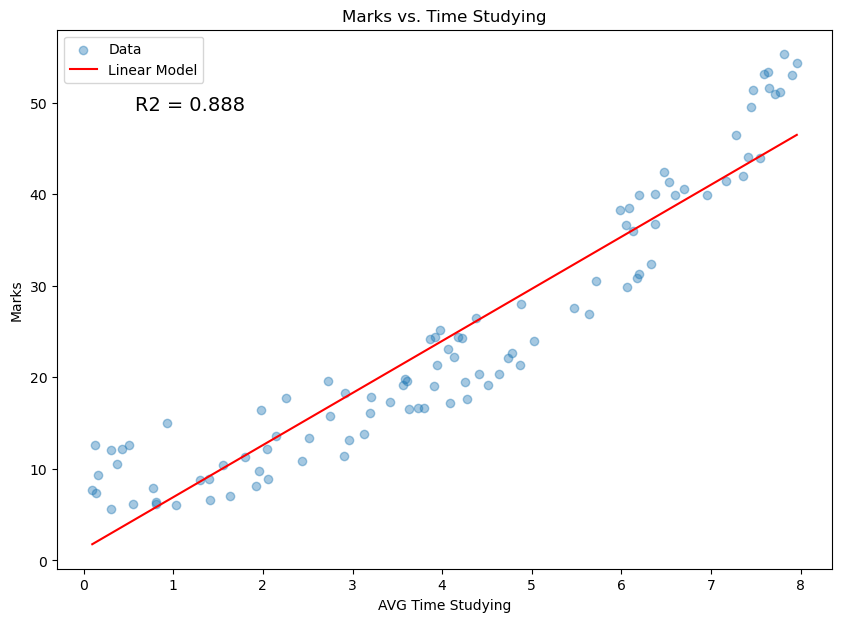

In [9]:
# 14 pts
# YOUR CODE HERE:

X = academics[['time_study_avg']].values
y = academics['Marks'].values
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Fit the model
betas, R2 = linearModelFit(X, y, linearModelLossRSS)

# Generating new X matrix for predictions
X_new = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
X_new = np.hstack((np.ones((X_new.shape[0], 1)), X_new.reshape(-1, 1)))

# Making predictions
y_pred = X_new @ betas

# Plotting
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 1], y, label='Data', alpha=0.4)
plt.plot(X_new[:, 1], y_pred, 'r', label='Linear Model')
plt.xlabel('AVG Time Studying')
plt.ylabel('Marks')
plt.title('Marks vs. Time Studying')
plt.legend()

# plot R2 value on the plot using anotate function
plt.annotate(f'R2 = {R2:.3f}', xy=(0.1, 0.85), xycoords='axes fraction', fontsize=14)

plt.show()


---

## Part 2: LAD Regression


---

### Question 2.1 [10 points]

In the previous section, we worked with the OLS loss. Now, we'll implement a linear model with the least absolute deviation (LAD) loss.

Write a function `linearModelLossLAD` which computes the least absolute deviation loss function for a linear model parameterized by $\beta$, as well as the gradient of the loss. The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with the values:

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2])
```

It must return:

LAD of `2.0`

Gradient of `[-1. -1.]`


In [10]:
# 10 points
# YOUR CODE HERE:

def linearModelLossLAD(beta, X, y):
    yp = linearModelPredict(beta, X)
    residuals = y - yp
    lad_loss = np.sum(np.abs(residuals))
    gradient = -np.sign(residuals) @ X
    return lad_loss, gradient

# Test the function
X = np.array([[1, 0], [1, -1], [1, 2]])
b = np.array([0.1, 0.3])
y = np.array([0, 0.4, 2])

lad_loss, gradient = linearModelLossLAD(b, X, y)

print("LAD Loss:", lad_loss)
print("Gradient:", gradient)


LAD Loss: 2.0
Gradient: [-1. -1.]


---

### Question 2.2: [10 points]

Use the above functions to fit your LAD model. Use your model to make predictions along a grid of 100 equally spaced students time_study_avg. Once fit, add the fitted line to the scatter plot as in question 1.5. Also report the $R^2$-value.

Note: If you recieve an error from the optimizer, it may be because the loss function for the LAD model is not differentiable at its minimum. This will lead to some gradient based optimizers to fail to converge. If this happens to you then pass `method="Powell"` to `scipy.optimize.minimize`.


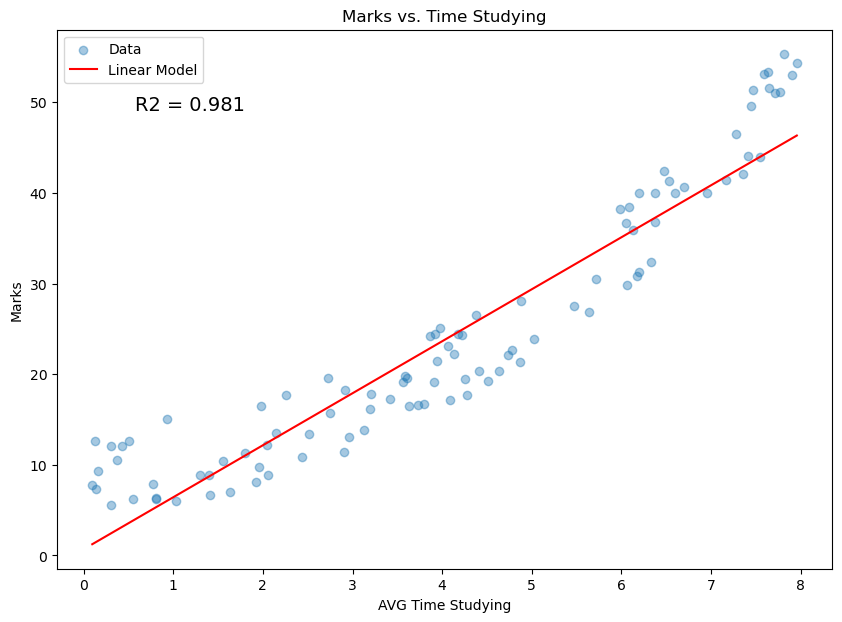

In [11]:
# 8 points
# YOUR CODE HERE:

X = academics[['time_study_avg']].values
y = academics['Marks'].values
X = np.hstack((np.ones((X.shape[0], 1)), X))

# fit the model
betas, R2 = linearModelFit(X, y, linearModelLossLAD)

# Generating new X matrix for predictions
X_new = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
X_new = np.hstack((np.ones((X_new.shape[0], 1)), X_new.reshape(-1, 1)))

# Making predictions
y_pred = X_new @ betas

# Plotting
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 1], y, label='Data', alpha=0.4)
plt.plot(X_new[:, 1], y_pred, 'r', label='Linear Model')
plt.xlabel('AVG Time Studying')
plt.ylabel('Marks')
plt.title('Marks vs. Time Studying')
plt.legend()

# Annotate R2 value on the plot
plt.annotate(f'R2 = {R2:.3f}', xy=(0.1, 0.85), xycoords='axes fraction', fontsize=14)
plt.show()


**Written question**: What is the difference in the fit obtained with an L1 as compared to the L2 cost function? How their $R^2$ values compare? Why? [2 points]


<font color='yellow'>**Written Answer:**

The difference in fit between L1 (LAD) cost function vs L2 (RSS) cost function lies in how outliers in data are handled. L1 doesn't penalize large deviations as much as L2 because it minimizes the sum of absolute differences between predicted and actual values whereas L2 will square the residuals from each prediction and actual value which ends up giving more weight to larger differences due to the squaring of the residuals. L1 is similar to getting a median in capturing central tendency and being less effected by outliers while L2 is similar to getting a mean. When we compare $R^2$ values a higher $R^2$ for LAD Loss (0.981) compared to RSS Loss (0.888) suggests that the LAD model is better at capturing this data and generating more accurate predictions due to LAD's robustness to outliers which we can see are present in the scatter plot around 8 hours of AVG Time Studying where the model prediction (red-line) vs the actual data have a larger difference which may be why LAD results in a closer to 1 $R^2$ value. Therefore, LAD Loss has a higher $R^2$ value indicating it better predicts the data under these circumstances which leads us to favoring it for our model.
<font>


---

### Question 2.3: [12 points]

Fit an OLS model to all student data with the `linear_model` module from the `sklearn` package by using the [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class. The features (i.e., predictors) to use are average study time, and number of courses.


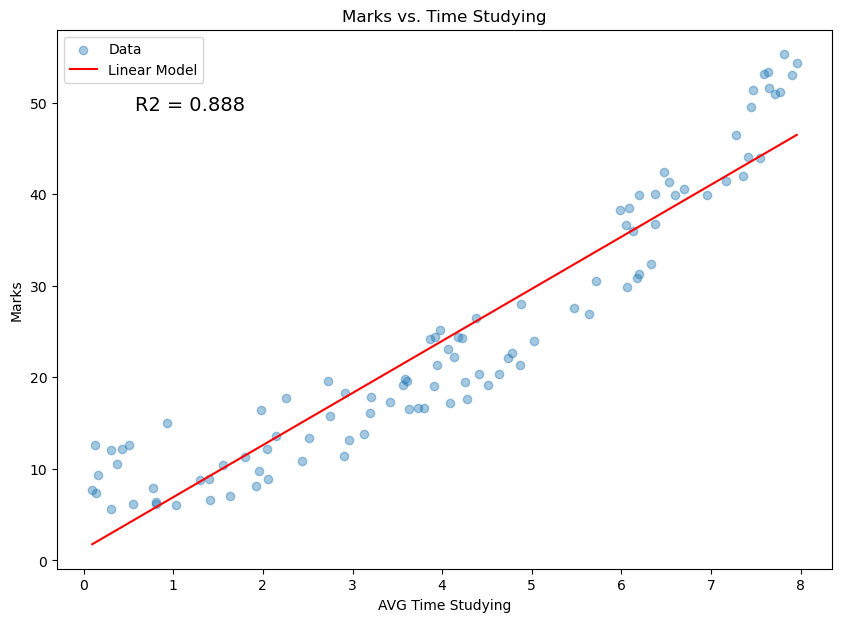

In [12]:
# 8 points
# YOUR CODE HERE:

import sklearn.linear_model as lm

X = academics[['time_study_avg']].values
y = academics['Marks'].values

# Fit the model
model = lm.LinearRegression()
model.fit(X, y)

# Generating new X matrix for predictions
X_new = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Making predictions
y_pred = model.predict(X_new)

# Plotting
plt.figure(figsize=(10, 7))
plt.scatter(X, y, label='Data', alpha=0.4)
plt.plot(X_new, y_pred, 'r', label='Linear Model')
plt.xlabel('AVG Time Studying')
plt.ylabel('Marks')
plt.title('Marks vs. Time Studying')
plt.legend()

# Annotate R2 value on the plot
plt.annotate(f'R2 = {model.score(X, y):.3f}', xy=(0.1, 0.85), xycoords='axes fraction', fontsize=14)
plt.show()


In no more than two sentences, comment on the $R^2$ values from your `sklearn` model and previous models. Are they similar? [4 pts]


<font color='yellow'>**Written Answer:**

The sklearn model and the model I used prior with the L2 cost function (RSS Loss) both have the same $R^2$ value because both use L2 Cost Functions, and since L2 cost functions mimic means tendency to disproportionally weigh outliers they both are beaten by the L1 cost function model (LAD Loss) in terms of their $R^2$ values for this given data and situation. The LAD Loss function resulted in a higher $R^2$ than both other models because of better resistance to outliers.
</font>


---

## Part 3: Custom loss function


---

### Question 3.1: [4 points]

Assume that the following function has been proposed to you to use as a new loss function for regression:

$$L_3(\hat{\beta}) = \sum_{i=1}^{n} ({y_i-\hat{y_i}})^3$$

What do you think about this new loss function, would you accept it? Please, explain.


<font color='yellow'>**Written answer:**

The LAD loss function and RSS loss function treat underestimation and overestimation equally even if RSS overweighs higher residuals however because of the cube term this loss function is not symmetric like the prior two. Calculating the gradient of this higher order derivative would be harder when we need to optimize by finding this loss functions gradient. Cubing the residuals makes the loss function highly sensitive to outliers more than RSS which might lead to a model that is overly influenced by outliers and prone to over fitting the data and becoming unusable for general application for the population our data is based on. Based on these reasons we can be cautious of accepting this loss function unless other benefits are to be had for using this function.
</font>


---

### Question 3.2: [10 points]

Regardless of your answer to Question 4.1, taking $\: \hat{\mathbf{y}} = \mathbf{X.^2} \hat{\beta}\:$ as your functional form for regression (note that $\mathbf{X.^2}$ implies element-wise power), use your knowledge of calculus to calculate the gradient of $\: L_3(\hat{\beta}).$ Type your answer (including the intermediate steps) in the cell below in Latex format. Note that $\hat{\beta}=[\beta_0, \beta_1]^T$, and $\mathbf{X}$ is an $n$-by-$2$ matrix.


<font color='yellow'>**Written answer:**

Given the loss function: $L_3(\hat{\beta}) = \sum_{i=1}^{n} ({y_i-\hat{y_i}})^3$

Calculating the gradient:

Derivative of the loss function:
$\frac{\partial L_3(\hat{\beta})}{\partial \hat{\beta}} = \sum_{i=1}^{n} \frac{\partial}{\partial \hat{\beta}} \left( y_i - (\mathbf{X_{i}}.^2) \hat{\beta} \right)^3$

Applying the chain rule:
$\frac{\partial L_3(\hat{\beta})}{\partial \hat{\beta}} = \sum_{i=1}^{n} 3 \left( y_i - (\mathbf{X_{i}}.^2) \hat{\beta} \right)^2 \cdot \frac{\partial}{\partial \hat{\beta}} \left( y_i - (\mathbf{X_{i}}.^2) \hat{\beta} \right)$

Differentiating the inner term:
$\frac{\partial}{\partial \hat{\beta}} \left( y_i - (\mathbf{X_{i}}.^2) \hat{\beta} \right) = -(\mathbf{X_{i}}.^2)$

The gradient of the loss function $L_3(\hat{\beta})$:
$$\frac{\partial L_3(\hat{\beta})}{\partial \hat{\beta}} = -3 \sum_{i=1}^{n} (\mathbf{X_{i}}.^2)^T \left( y_i - (\mathbf{X_{i}}.^2) \hat{\beta} \right)^2$$
</font>
